# Terry Stop Classification Model

A Terry Stop, also known as a "Stop, Question, and Frisk" or a "Stop and Frisk" is based on the Supreme Court case *Terry V. Ohio*. The court in Terry held that a stop and frisk must comply with the Fourth Amendment, meaning that the stop-and-frisk cannot be unreasonable.

![Stop and frisk](./data/th.jpg)

A reasonable stop-and-frisk is one in which a reasonably prudent office is endangered. He/she may make a reasonable search for weapons of the person believed by him to be armed and dangerous.

When an officer has a *reasonable suspicion* that an individual is armed, engaged in, or about to be engaged in criminal conduct, the office may briefly stop and detain an individual for a *pat-down*

In a traffic stop setting, the Terry condition of a lawful investigatory stop is met whenever it is lawful for the police to detain an automobile and its occupants pending inquiry into a vehicular violation. The police do not need to believe that any occupant of the vehicle is involved in criminal activity. The reasonable suspicion of criminal activities discovered during the traffic stop may give rise to a Terry stop.

## Exlporatory Data Analysis
We'll use a number of Datasets, Seattle PD and NYPD. We'll process the data and create a classification that will help predict whether an arrest was made after a Terry Stop,

### Import the required Datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_absolute_error, root_mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree


#import the seattle PD data and print the first 5 rows
seattle_data = pd.read_csv("./data/Terry_Stops_20241018.csv")
nypd_data = pd.read_excel("./data/NYPD_terry_stops.xlsx")

seattle_data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20150000005870,101060,Field Contact,NaN,4980,1962,F,White,...,15:12:00.0000000,-,-,-,WEST PCT 2ND W - QUEEN - PLATOON 1,N,N,-,-,-
1,26 - 35,-1,20150000089918,28823,Arrest,NaN,5143,1957,M,Black or African American,...,19:13:00.0000000,ROBBERY - CRITICAL (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,NaN,N,Y,East,C,C1
2,-,-1,20180000078041,463764,Arrest,NaN,6921,1978,M,Asian,...,04:27:00.0000000,TRESPASS,--WARRANT SERVICES - MISDEMEANOR,911,SOUTH PCT 3RD W - ROBERT - PLATOON 2,N,Y,South,R,R2
3,56 and Above,12770971382,20200000175799,13267969395,Arrest,-,7266,1976,M,White,...,11:17:19.0000000,ASLT - CRITICAL (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 1ST W - KING - PLATOON 1,Y,N,West,K,K1
4,26 - 35,-1,20160000108160,141119,Offense Report,NaN,7288,1984,M,White,...,17:35:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,911,EAST PCT 2ND W - E/G RELIEF,N,N,East,E,E2


In [2]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61555 non-null  object
 1   Subject ID                61555 non-null  int64 
 2   GO / SC Num               61555 non-null  int64 
 3   Terry Stop ID             61555 non-null  int64 
 4   Stop Resolution           61555 non-null  object
 5   Weapon Type               28990 non-null  object
 6   Officer ID                61555 non-null  object
 7   Officer YOB               61555 non-null  int64 
 8   Officer Gender            61555 non-null  object
 9   Officer Race              61555 non-null  object
 10  Subject Perceived Race    61555 non-null  object
 11  Subject Perceived Gender  61555 non-null  object
 12  Reported Date             61555 non-null  object
 13  Reported Time             61555 non-null  object
 14  Initial Call Type     

In [3]:
seattle_data.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.155500e+04,6.155500e+04,6.155500e+04,61555.000000
mean,7.514672e+09,2.018711e+13,1.258517e+10,1984.135976
std,1.307486e+10,8.549706e+10,1.800415e+10,9.467342
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.413675e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.132840e+05,1986.000000
75%,7.755940e+09,2.021000e+13,2.040625e+10,1991.000000
max,6.008468e+10,2.024000e+13,6.008639e+10,2002.000000


In [4]:
seattle_data.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

In [5]:
seattle_data.nunique()

Subject Age Group               7
Subject ID                  17255
GO / SC Num                 49330
Terry Stop ID               61450
Stop Resolution                 5
Weapon Type                    22
Officer ID                   1391
Officer YOB                    56
Officer Gender                  3
Officer Race                   13
Subject Perceived Race         11
Subject Perceived Gender        7
Reported Date                3504
Reported Time               24063
Initial Call Type             182
Final Call Type               199
Call Type                       8
Officer Squad                 272
Arrest Flag                     2
Frisk Flag                      3
Precinct                        9
Sector                         20
Beat                           55
dtype: int64

* Based on the dataset description, "Arrest Flag" indicates whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS). We'll use this as our target

In [6]:
seattle_data['Arrest Flag'].value_counts()

Arrest Flag
N    54851
Y     6704
Name: count, dtype: int64

In [7]:
seattle_data['Arrest Flag'].isnull().sum()

0

In [8]:
seattle_data['Arrest Flag'] = seattle_data['Arrest Flag'].map({"Y": 1, "N": 0})

In [9]:
seattle_data['Arrest Flag'].value_counts()

Arrest Flag
0    54851
1     6704
Name: count, dtype: int64

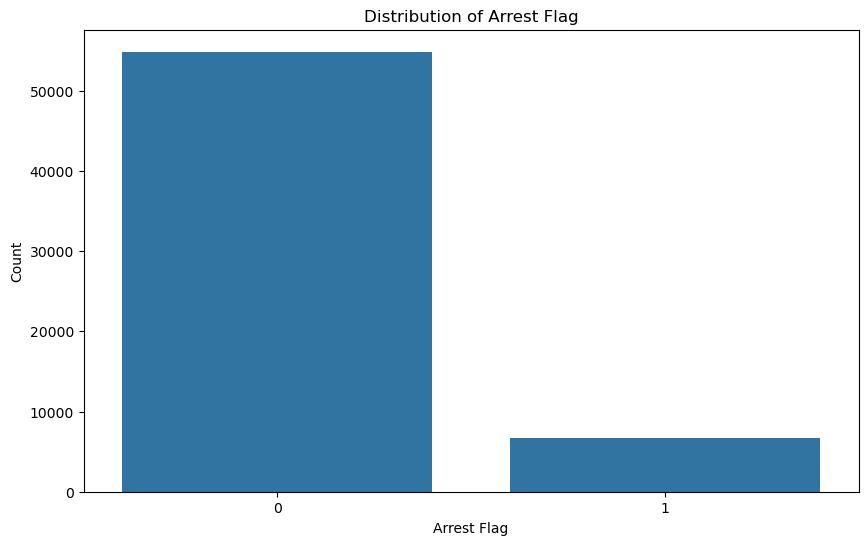

In [10]:
plt.figure(figsize=(10,6))

sns.countplot(data=seattle_data, x=seattle_data['Arrest Flag'])
plt.title("Distribution of Arrest Flag")
plt.xlabel("Arrest Flag")
plt.ylabel("Count")
plt.show()

##  This shows the count of each class in Arrest Flag. A large difference in counts between classes indicates an imbalance.

In [11]:
'''I will use these intial features to preform my model'''
seattle_data[['Call Type','Final Call Type','Stop Resolution','Officer Gender', 'Officer Race','Frisk Flag']]

,Call Type,Final Call Type,Stop Resolution,Officer Gender,Officer Race,Frisk Flag
0,-,-,Field Contact,F,White,N
1,911,--ROBBERY - STRONG ARM,Arrest,M,Black or African American,Y
2,911,--WARRANT SERVICES - MISDEMEANOR,Arrest,M,Asian,Y
3,911,"--ASSAULTS, OTHER",Arrest,M,White,N
4,911,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,Offense Report,M,White,N
...,...,...,...,...,...,...
61550,-,-,Field Contact,M,White,N
61551,911,--DISTURBANCE - OTHER,Field Contact,M,White,N
61552,ONVIEW,--WARRANT SERVICES - MISDEMEANOR,Field Contact,F,White,N
61553,ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Field Contact,M,White,N


In [12]:
arrest_data = seattle_data[seattle_data['Arrest Flag'] == 1]
arrest_data

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
3,56 and Above,12770971382,20200000175799,13267969395,Arrest,-,7266,1976,M,White,...,11:17:19.0000000,ASLT - CRITICAL (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 1ST W - KING - PLATOON 1,1,N,West,K,K1
13,26 - 35,7727677416,20200000162912,13175704162,Arrest,-,8644,1995,M,Two or More Races,...,22:29:44.0000000,TRESPASS,--PROWLER - TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 3RD W - UNION - PLATOON 1,1,N,North,U,U1
35,18 - 25,31629644948,20220000135691,34067259361,Arrest,-,8554,1990,M,White,...,09:38:37.0000000,ASLT - DV CRITICAL,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",911,NORTH PCT 1ST W - BOY (JOHN) - PLATOON 1,1,N,North,B,B1
38,26 - 35,56845206186,20240000196562,57680658476,Arrest,-,8874,1998,M,Hispanic,...,01:36:07.0000000,DISTURBANCE - DV CRITICAL,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,EAST PCT 3RD W - GEORGE (CHARLIE) - PLATOON 1,1,Y,East,G,G1
55,36 - 45,7704469768,20190000454001,12034401373,Arrest,-,8626,1992,M,White,...,10:56:31.0000000,FIGHT - CRITICAL WITH WEAPONS,"--ASSAULTS, OTHER",ONVIEW,WEST PCT 1ST W - KING - PLATOON 1,1,N,West,K,K2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,18 - 25,34603052213,20220000170465,34603243727,Arrest,Blunt Object/Striking Implement,8377,1983,M,White,...,16:57:43.0000000,DISTURBANCE,--DISTURBANCE - OTHER,911,EAST PCT 2ND W - CHARLIE - PLATOON 2,1,Y,East,C,C1
61532,26 - 35,7735857164,20210000284684,29319133500,Arrest,-,8768,1988,M,Asian,...,00:05:08.0000000,ORDER - CRITICAL VIOLATION OF DV COURT ORDER,--DV - ENFORCE COURT ORDER (ARREST MANDATED),911,WEST PCT 3RD W - KING - PLATOON 1,1,Y,West,K,K3
61533,18 - 25,7741755512,20240000210107,57961741719,Arrest,Taser/Stun Gun,8897,1987,M,White,...,05:21:37.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--BURGLARY - NON RESIDENTIAL/COMMERCIAL,911,EAST PCT 3RD W - GEORGE - PLATOON 2,1,Y,East,G,G1
61542,36 - 45,7728211859,20210000118981,24057502078,Arrest,-,8633,1988,M,Black or African American,...,15:25:28.0000000,BURG - OCCUPIED RESD,--PROWLER - TRESPASS,911,WEST PCT 2ND W - K/Q RELIEF,1,Y,West,Q,Q2


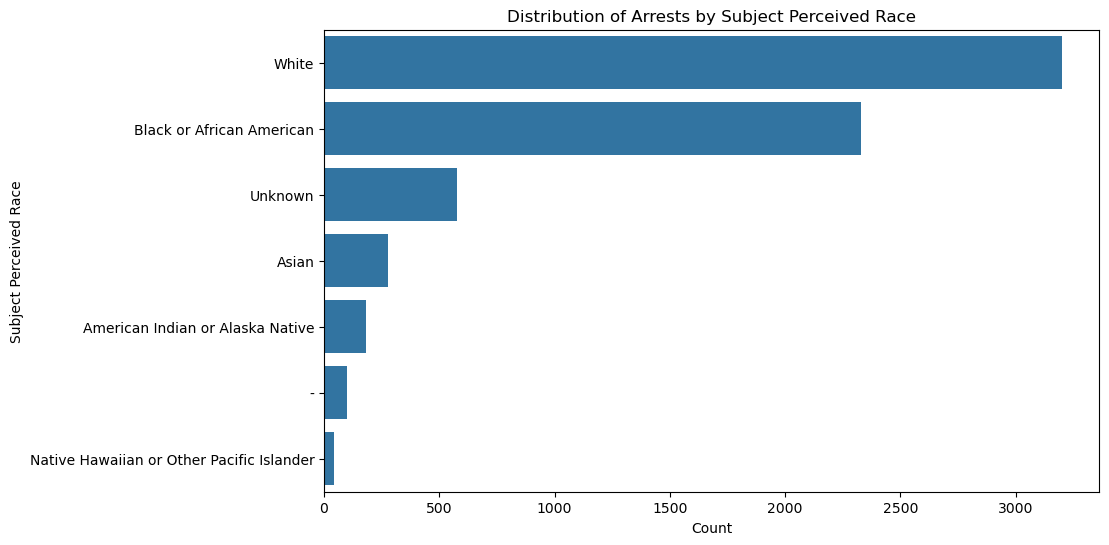

In [13]:
# Plot arrests by race
plt.figure(figsize=(10, 6))
sns.countplot(y="Subject Perceived Race", data=arrest_data, order=arrest_data["Subject Perceived Race"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Race")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.show()

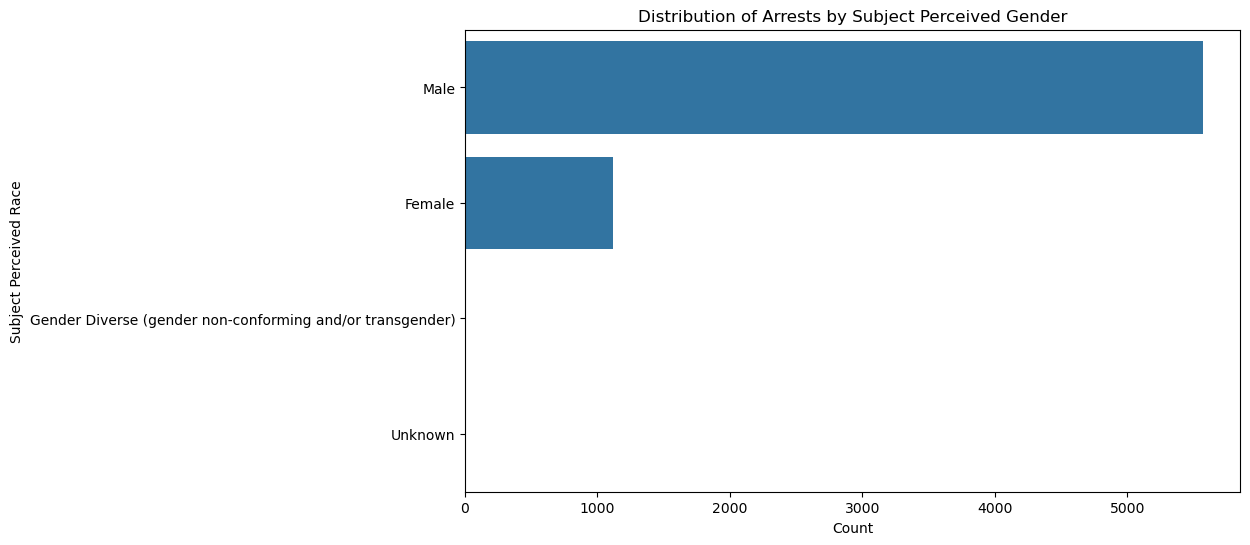

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Subject Perceived Gender", data=arrest_data, order=arrest_data["Subject Perceived Gender"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Gender")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.show()

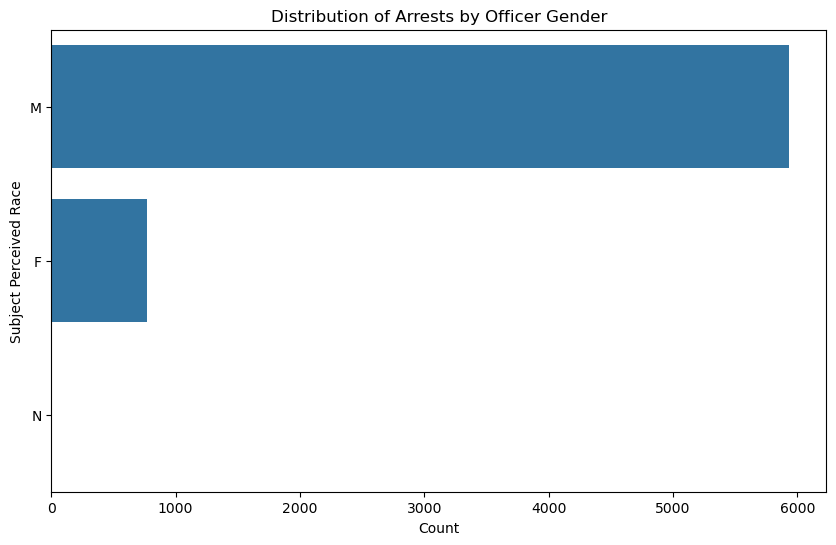

In [15]:
# Plot arrests by race
plt.figure(figsize=(10, 6))
sns.countplot(y="Officer Gender", data=arrest_data, order=arrest_data["Officer Gender"].value_counts().index)
plt.title("Distribution of Arrests by Officer Gender")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.show()

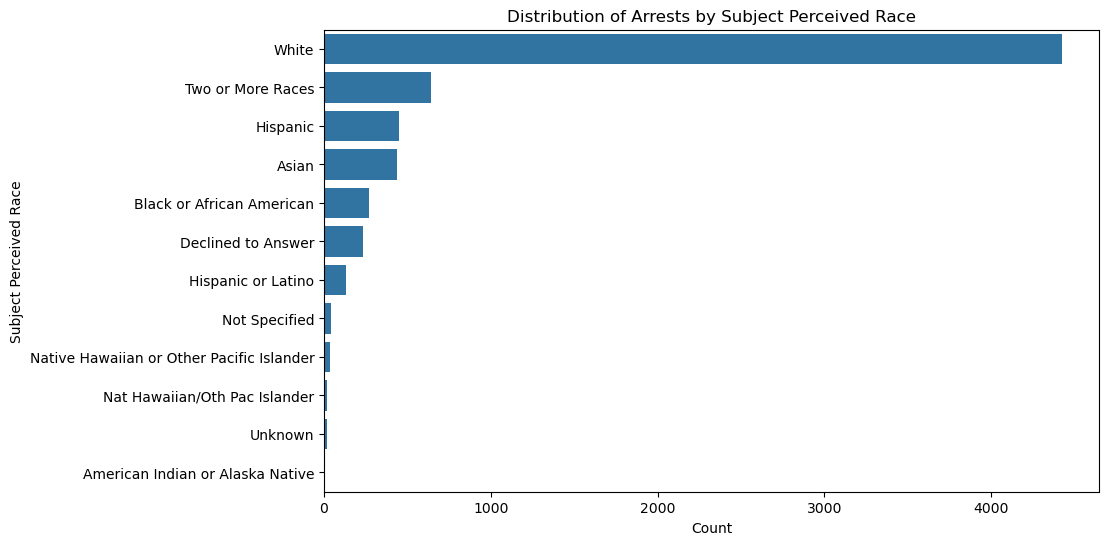

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Officer Race", data=arrest_data, order=arrest_data["Officer Race"].value_counts().index)
plt.title("Distribution of Arrests by Subject Perceived Race")
plt.xlabel("Count")
plt.ylabel("Subject Perceived Race")
plt.show()

### This heatmap will help identify the strength and direction of relationships between numerical features, which can highlight potential predictors.
* Since there are only a handful of continuous variables, we will need to encoded the categorical variables and find a correlation to the target

In [17]:
# features = ['Subject Age Group', 'Weapon Type', 'Officer YOB','Officer Gender', 'Officer Race', 'Subject Perceived Race','Initial Call Type', 'Precinct']
features = ['Final Call Type','Stop Resolution','Subject Perceived Gender', 'Subject Perceived Race','Frisk Flag']
feature_data = seattle_data[features]
X = feature_data
y = seattle_data['Arrest Flag']

In [18]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, test_size=0.2)

In [19]:
print(f"X_train for the seattle dataset is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} colums.")
print(f"y_train for seattle dataset is a Series with {y_train.shape[0]} values.")

X_train for the seattle dataset is a DataFrame with 49244 rows and 5 colums.
y_train for seattle dataset is a Series with 49244 values.


In [20]:
X_train.dtypes

Final Call Type             object
Stop Resolution             object
Subject Perceived Gender    object
Subject Perceived Race      object
Frisk Flag                  object
dtype: object

In [ ]:
def reformat_columns(data, return_type='dataframe'):
    '''Function that reformat the columns.
    adding an underscore to the naming convention and lowering the font'''
    if isinstance(data, pd.DataFrame):
        # Reformat columns for DataFrame
        formatted_columns = data.rename(columns=lambda x: x.replace(' ', '_').lower())
        if return_type == "dataframe":
            return formatted_columns
        elif return_type == "series":
            return formatted_columns.columns.to_series()
        else:
            raise ValueError("return_type must be either 'dataframe' or 'series' when data is a DataFrame.")
            
      # Check if the input is a Series
    elif isinstance(data, pd.Series):
        # Reformat the Series name if it has one
        formatted_columns = data.rename(data.name.replace(' ', '_').lower() if data.name else None)
    return formatted_columns

In [22]:
#Let's change the string style to a more conventional style
X_train = reformat_columns(X_train)
X_train.columns

Index(['final_call_type', 'stop_resolution', 'subject_perceived_gender',
       'subject_perceived_race', 'frisk_flag'],
      dtype='object')

In [23]:
y_train = reformat_columns(y_train)
y_train.name

'arrest_flag'

In [24]:
X_test = reformat_columns(X_test)
X_test.columns

Index(['final_call_type', 'stop_resolution', 'subject_perceived_gender',
       'subject_perceived_race', 'frisk_flag'],
      dtype='object')

In [25]:
y_test = reformat_columns(y_test)
y_test.name

'arrest_flag'

We will tackle each column and standardize them

In [26]:
X_train_categorical = X_train.select_dtypes(include=['object'])
X_train_categorical.columns

Index(['final_call_type', 'stop_resolution', 'subject_perceived_gender',
       'subject_perceived_race', 'frisk_flag'],
      dtype='object')

In [27]:
X_test_categorical = X_test.select_dtypes(include=['object'])
X_test_categorical.columns

Index(['final_call_type', 'stop_resolution', 'subject_perceived_gender',
       'subject_perceived_race', 'frisk_flag'],
      dtype='object')

In [28]:
X_train_categorical = X_train_categorical.replace(['None','-','N/A'],np.nan)
X_test_categorical = X_test_categorical.replace(['None','-', 'N/A'], np.nan)

In [29]:


imputer = SimpleImputer(strategy='constant', fill_value=None)
imputer.fit(X_train_categorical)

X_train_imputed = imputer.transform(X_train_categorical)

X_test_imputed = imputer.transform(X_test_categorical)

X_train_categorical_imputer = pd.DataFrame(X_train_imputed, columns=X_train_categorical.columns, index=X_train_categorical.index)

X_test_categorical_imputer = pd.DataFrame(X_test_imputed, columns=X_test_categorical.columns, index=X_test_categorical.index)



In [30]:
X_train_categorical_imputer.isna()

,final_call_type,stop_resolution,subject_perceived_gender,subject_perceived_race,frisk_flag
37396,False,False,False,False,False
7786,False,False,False,False,False
16995,False,False,False,False,False
55912,False,False,False,False,False
31610,False,False,False,False,False
...,...,...,...,...,...
48056,False,False,False,False,False
59011,False,False,False,False,False
11513,False,False,False,False,False
1688,False,False,False,False,False


In [31]:
for val in X_train_categorical_imputer.columns:
    print(X_train_categorical[[val]].value_counts().sort_values(ascending=True))
    print()

final_call_type                         
--PREMISE CHECKS - REQUEST TO WATCH            1
RAPE                                           1
UNKNOWN - COMPLAINT OF UNKNOWN NATURE          1
ROBBERY (INCL STRONG ARM)                      1
--ALARM-VEHICLE ALARMS                         1
                                            ... 
--WARRANT SERVICES - FELONY                 1745
--ASSAULTS, OTHER                           2435
--DISTURBANCE - OTHER                       2951
--PROWLER - TRESPASS                        3479
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    4536
Name: count, Length: 190, dtype: int64

stop_resolution         
Citation / Infraction         173
Referred for Prosecution      588
Arrest                      11945
Offense Report              12621
Field Contact               23917
Name: count, dtype: int64

subject_perceived_gender                                 
MULTIPLE SUBJECTS                                                1
Gender Diverse (gender non-confor

In [32]:
X_train_categorical_imputer.isna().sum()

final_call_type             0
stop_resolution             0
subject_perceived_gender    0
subject_perceived_race      0
frisk_flag                  0
dtype: int64

In [33]:
# ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1]])  # Use -1 for unknown categories


# X_train_categorical_imputer['subject_age_group_encoded'] = ordinal_enc.fit_transform(
#     X_train_categorical_imputer[['subject_age_group']]
# )

# # Convert the transformed data to a DataFrame
# X_train_categorical_ordinal_df = X_train_categorical_imputer[['subject_age_group']]

# # Concatenate the original DataFrame with the encoded column
# X_train_categorical_encoded = pd.concat(
#     [X_train_categorical_imputer, X_train_categorical_ordinal_df], 
#     axis=1
# )

# X_train_categorical_encoded = X_train_categorical_encoded.drop('subject_age_group', axis=1)
# # X_train_categorical_encoded = X_train_categorical_encoded.drop('subjec_age_group', axis=1)


# X_test_categorical_ordinal = ordinal_enc.transform(X_test_categorical_imputer[['subject_age_group']])

# X_test_categorical_ordinal_df = pd.DataFrame(X_test_categorical_ordinal, 
#                                              columns=['subject_age_group_encoded'],
#                                              index=X_test_categorical_imputer.index)
# X_test_categorical_encoded = pd.concat(
#     [X_test_categorical, X_test_categorical_ordinal_df], 
#     axis=1
# )

# X_test_categorical_encoded = X_test_categorical_encoded.drop('subject_age_group', axis=1)

# X_train_categorical_encoded

In [34]:
X_test_categorical_imputer

,final_call_type,stop_resolution,subject_perceived_gender,subject_perceived_race,frisk_flag
36992,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Field Contact,Male,White,Y
61480,missing_value,Field Contact,Male,Black or African American,N
32955,--BURGLARY - RESIDENTIAL OCCUPIED,Arrest,Male,White,N
38484,"--ARSON, BOMBS, EXPLO - RECKLESS BURNING",Arrest,Male,White,N
60377,--CRISIS COMPLAINT - GENERAL,Field Contact,Female,White,N
...,...,...,...,...,...
58266,missing_value,Field Contact,Male,White,N
46339,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,Arrest,Male,Black or African American,N
31647,missing_value,Field Contact,Male,White,N
35209,--THEFT - CAR PROWL,Field Contact,Male,Unknown,N


In [35]:
X_train_categorical_imputer.dtypes

final_call_type             object
stop_resolution             object
subject_perceived_gender    object
subject_perceived_race      object
frisk_flag                  object
dtype: object

We encoded the groups within 'Subject_Age_Group' Column. The numbers range from 0.0 ('Empty' or no information) to 5.0 (56 and above)

# One-Hot Encoder
We'll perform one-hot encoding on the categorical variables

## Encode the target for the train and test

In [37]:
y_train

37396    0
7786     0
16995    1
55912    1
31610    0
        ..
48056    0
59011    0
11513    0
1688     0
5994     0
Name: arrest_flag, Length: 49244, dtype: int64

0 = No, 1 = Yes

In [40]:
y_test

36992    0
61480    0
32955    0
38484    1
60377    0
        ..
58266    0
46339    1
31647    0
35209    0
620      0
Name: arrest_flag, Length: 12311, dtype: int64

### Based on the heatmap. We can see that the best correlation in regards to the target is "Stop Resolution", "Reported date", "Final Call Type", "call type", and finally "weapon type"

In [43]:

def one_hot_encode(train_data, test_data, drop='first', handle_unknown='ignore'):
    """
    Perform one-hot encoding on the categorical columns of train and test datasets.
    
    Parameters:
    - train_data (pd.DataFrame): The training dataset with categorical columns.
    - test_data (pd.DataFrame): The test dataset with categorical columns.
    - drop (str): Specifies a method to drop one of the levels. Default is 'first'.
    - handle_unknown (str): Specifies how to handle unknown categories. Default is 'ignore'.
    
    Returns:
    - train_encoded_df (pd.DataFrame): One-hot encoded training data as a DataFrame.
    - test_encoded_df (pd.DataFrame): One-hot encoded test data as a DataFrame.
    - encoded_columns (list): List of encoded column names.
    """
    # One-Hot Encoding on the ordinal encoded training data
    
    ohe = OneHotEncoder(sparse_output=False, drop=drop, handle_unknown=handle_unknown)
    
    # Ensure only the columns without unknown values are passed to OneHotEncoder
    X_train_encoder = ohe.fit_transform(train_data)
    
    # Apply One-Hot Encoding to the test data
    X_test_encoder = ohe.transform(test_data)
    
    # Get the encoded feature names
    encoded_columns = ohe.get_feature_names_out(input_features=X_train_categorical_imputer.columns)
    
    # Convert to DataFrames
    train_encoded_df = pd.DataFrame(X_train_encoder, columns=encoded_columns, index=X_train_categorical_imputer.index)
    test_encoded_df = pd.DataFrame(X_test_encoder, columns=encoded_columns, index=X_test_categorical_imputer.index)

    return train_encoded_df, test_encoded_df, encoded_columns

X_train_encoded_df, X_test_encoded_df, encoded_columns = one_hot_encode(X_train_categorical_imputer, X_test_categorical_imputer)


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [44]:
X_test_encoded_df

,"final_call_type_--ALARM-COMM ROBB (BANK, PANIC, DURESS)","final_call_type_--ALARM-OTHER (VARDA,PDT,FIRE,LOCAL,METRO,ETC))",final_call_type_--ALARM-RESIDENTIAL BURG,final_call_type_--ALARM-RESIDENTIAL PANIC OR DURESS,final_call_type_--ALARM-VEHICLE ALARMS,"final_call_type_--ANIMAL COMPLAINT - INJURED,DEAD,DANGEROUS","final_call_type_--ANIMAL COMPLAINT - NOISE,STRAY,BITE","final_call_type_--ARSON, BOMBS, EXPLO - ARSON","final_call_type_--ARSON, BOMBS, EXPLO - RECKLESS BURNING","final_call_type_--ARSON,BOMBS,EXPLO - BOMBS, EXPLO,LARGE FIREWORKS",...,subject_perceived_race_Hispanic,subject_perceived_race_MULTIPLE SUBJECTS,subject_perceived_race_Multi-Racial,subject_perceived_race_Native Hawaiian or Other Pacific Islander,subject_perceived_race_Other,subject_perceived_race_Unknown,subject_perceived_race_White,subject_perceived_race_missing_value,frisk_flag_Y,frisk_flag_missing_value
36992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
61480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
X_train_encoded_df

,"final_call_type_--ALARM-COMM ROBB (BANK, PANIC, DURESS)","final_call_type_--ALARM-OTHER (VARDA,PDT,FIRE,LOCAL,METRO,ETC))",final_call_type_--ALARM-RESIDENTIAL BURG,final_call_type_--ALARM-RESIDENTIAL PANIC OR DURESS,final_call_type_--ALARM-VEHICLE ALARMS,"final_call_type_--ANIMAL COMPLAINT - INJURED,DEAD,DANGEROUS","final_call_type_--ANIMAL COMPLAINT - NOISE,STRAY,BITE","final_call_type_--ARSON, BOMBS, EXPLO - ARSON","final_call_type_--ARSON, BOMBS, EXPLO - RECKLESS BURNING","final_call_type_--ARSON,BOMBS,EXPLO - BOMBS, EXPLO,LARGE FIREWORKS",...,subject_perceived_race_Hispanic,subject_perceived_race_MULTIPLE SUBJECTS,subject_perceived_race_Multi-Racial,subject_perceived_race_Native Hawaiian or Other Pacific Islander,subject_perceived_race_Other,subject_perceived_race_Unknown,subject_perceived_race_White,subject_perceived_race_missing_value,frisk_flag_Y,frisk_flag_missing_value
37396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
X_train_encoded_df.to_csv('./data/X_train_df.csv')

In [52]:
X_test_encoded_df.to_csv('./data/X_test_df.csv')

In [49]:
# Calculate correlations for each feature in X_train_encoded_df with y_train_encoded_series
target_correlation = X_train_encoded_df.corrwith(y_train)

# Convert to DataFrame for easier visualization
correlation_df = target_correlation.to_frame(name="Correlation with Target")

# Get the top 5 features with the closest (highest absolute) correlation to the target
top_10_features = correlation_df['Correlation with Target'].abs().nlargest(15).index
top_10_correlation_df = correlation_df.loc[top_10_features].sort_values(by="Correlation with Target", ascending=False)
top_10_correlation_df

,Correlation with Target
final_call_type_--TRAFFIC - D.U.I.,0.117901
final_call_type_--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),0.116026
"final_call_type_--ASSAULTS, OTHER",0.113199
"final_call_type_--ASSAULTS - HARASSMENT, THREATS",0.105179
frisk_flag_Y,0.105066
final_call_type_--BURGLARY - NON RESIDENTIAL/COMMERCIAL,0.093751
final_call_type_--WARRANT SERVICES - FELONY,0.092340
final_call_type_--BURGLARY - RESIDENTIAL OCCUPIED,0.077093
subject_perceived_race_Hispanic,-0.058233
final_call_type_--PROWLER - TRESPASS,-0.058940


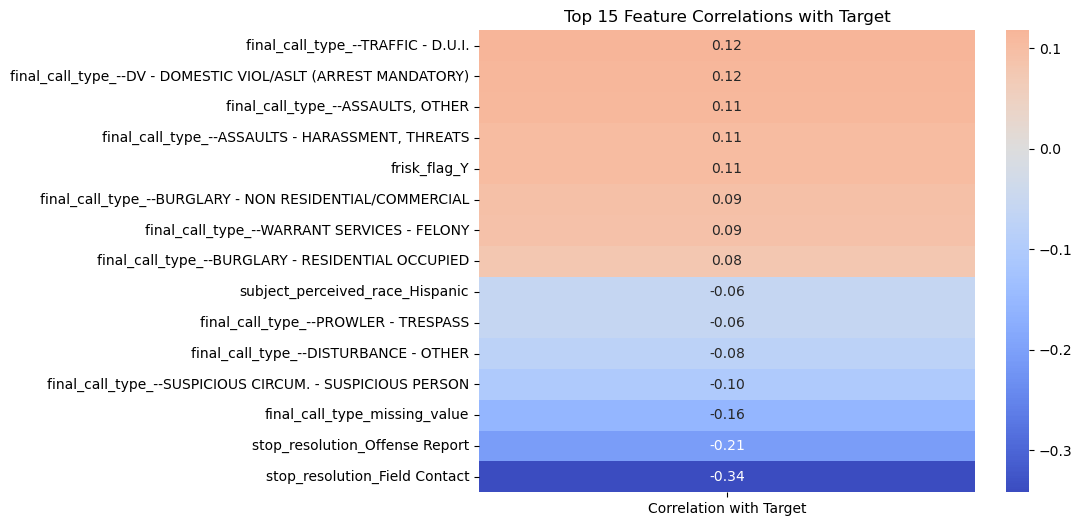

In [50]:
# Plot the correlations of top 5 features
plt.figure(figsize=(8, 6))
sns.heatmap(top_10_correlation_df, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
plt.title("Top 15 Feature Correlations with Target")
plt.show()

## Train a vanilla classfier

We will use a decision tree, since there are a large number of categorical columns that required One-hot encoding

R-Squared: 0.3828886328012985
Mean Absolute Error: 0.1334452948443428
Mean Squared Error: 0.05776897142988683
Root Squared Mean Error: 0.2403517660219846
R-Squared: 0.3828886328012985


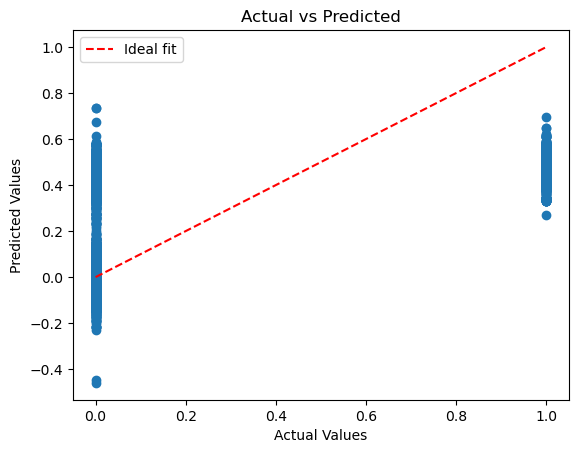

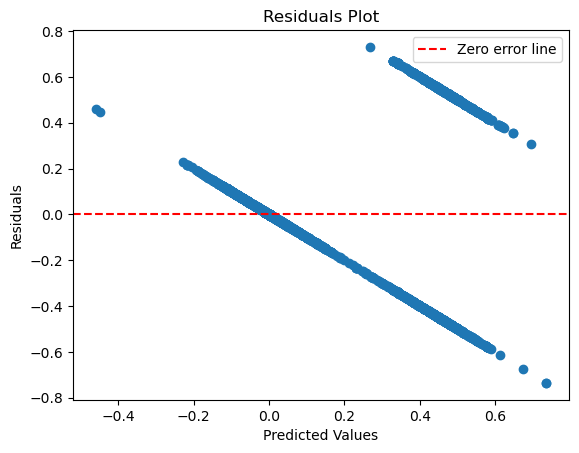

In [52]:
model = LinearRegression().fit(X_train_encoded_df, y_train)

y_prediction = model.predict(X_test_encoded_df)
# R-squared
r_squared = model.score(X_test_encoded_df, y_test)


print(f"R-Squared: {r_squared}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_prediction)}")
print(f"Mean Squared Error: {np.sum(np.power(y_test - y_prediction, 2))/len(y_test)}")
print(f"Root Squared Mean Error: {root_mean_squared_error(y_test, y_prediction)}")
print(f"R-Squared: {r2_score(y_test, y_prediction)}")

plt.scatter(y_test, y_prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#Residuals
residuals = y_test - y_prediction

plt.scatter(y_prediction, residuals)
plt.axhline(y=0, color='red', linestyle='--', label='Zero error line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

In [54]:
logreg = LogisticRegression(random_state=23, max_iter=1000)

logreg.fit(X_train_encoded_df, y_train)

y_predict = logreg.predict(X_test_encoded_df)



# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test, y_predict)
logreg_precision = precision_score(y_test, y_predict, pos_label=1)
logreg_recall = recall_score(y_test, y_predict, pos_label=1)
logreg_f1 = f1_score(y_test, y_predict, pos_label=1)

# Probabilities
y_probabilites = logreg.predict_proba(X_test_encoded_df)[:,1]

false_positive, true_positive, thresholds = roc_curve(y_test, y_probabilites)

roc_auc = auc(false_positive, true_positive)



# Display results

print(f"Accuracy: {logreg_accuracy}")
print(f"Precision: {logreg_precision}")
print(f"Recall:  {logreg_recall}")
print(f"F1 Score: {logreg_f1}")
print(f"ROC AUC Score: {roc_auc}")
print()

# Confusion Matrix
logreg_conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", logreg_conf_matrix)

Accuracy: 0.9043944439931768
Precision: 0.5452302631578947
Recall:  0.5151515151515151
F1 Score: 0.5297642828605673
ROC AUC Score: 0.9486580032207753

Confusion Matrix:
 [[10471   553]
 [  624   663]]


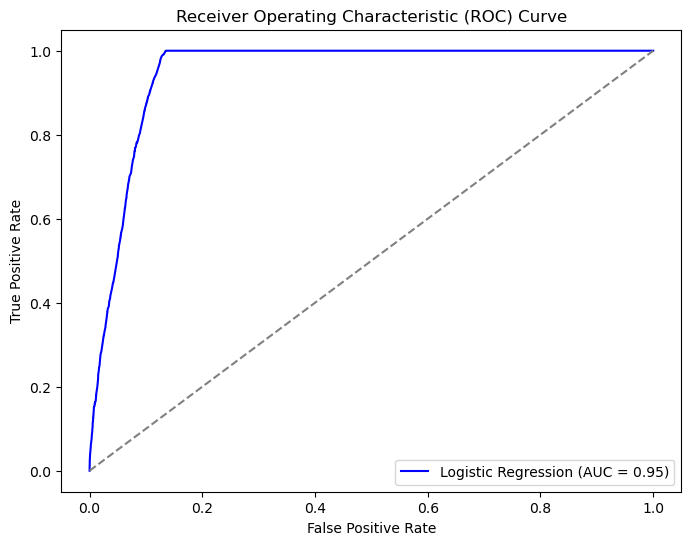

ROC AUC Score: <function roc_curve at 0x0000027EA401F2E0>


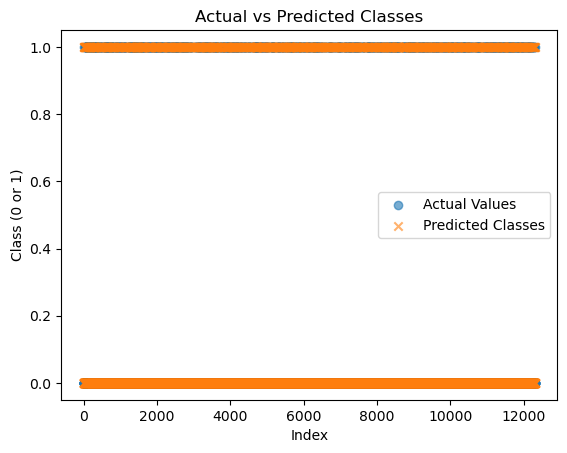

In [57]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive, true_positive, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC score
print(f"ROC AUC Score: {roc_curve}")


y_pred_classes = (y_predict > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', alpha=0.6)
plt.scatter(range(len(y_pred_classes)), y_pred_classes, label='Predicted Classes', marker='x', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.show()

In [59]:
y_test_encoded_series.to_csv('./data/y_test.csv')


In [60]:
y_probabilities_df = pd.DataFrame(y_probabilites, columns=['Predicted_Probability'])

# Export to CSV
y_probabilities_df.to_csv('y_probabilities.csv', index=False)

In [59]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=3, max_depth=5).fit(X_train_encoded_df, y_train)

### Make Predictions

In [62]:
#make predictions
y_pred = dt.predict(X_test_encoded_df)

In [63]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {np.sum(np.power(y_test - y_pred, 2))/len(y_test)}")
print(f"Root Squared Mean Error: {root_mean_squared_error(y_test, y_pred)}")
print(f"R-Squared: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.10454065469904963
Mean Squared Error: 0.10454065469904963
Root Squared Mean Error: 0.32332747284919916
R-Squared: -0.116745283018868


In [64]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

confus_matrix = confusion_matrix(y_test,y_pred)

print("Decision Tree Performance:\n")
print(f"Accuracy: {accuracy}\n")
print(f"Precision: {precision}\n")
print(f"Recall: {recall}\n")
print(f"F1-Score: {f1}\n")
print("\nConfusion Matrix")
print(confus_matrix)

Decision Tree Performance:

Accuracy: 0.8954593453009504

Precision: 0.0

Recall: 0.0

F1-Score: 0.0


Confusion Matrix
[[11024     0]
 [ 1287     0]]


c:\Users\omend\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
# check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
roc_auc

0.5

# Adjusting Hyperparameters

In [ ]:
cv_scores = cross_val_score(dt, X_train_encoded_df, y_train, cv=5, scoring="accuracy")
print(f"Cross-validated accuracy score: {cv_scores}")
print(f"Mean Score: {cv_scores.mean()}")
print(f"Standard Deviation scores: {cv_scores.std()}")

Cross-validated accuracy score: [0.8900396  0.88993806 0.88993806 0.88983653 0.89002843]
Mean Score: 0.8899561382563137
Standard Deviation scores: 7.36898549184138e-05


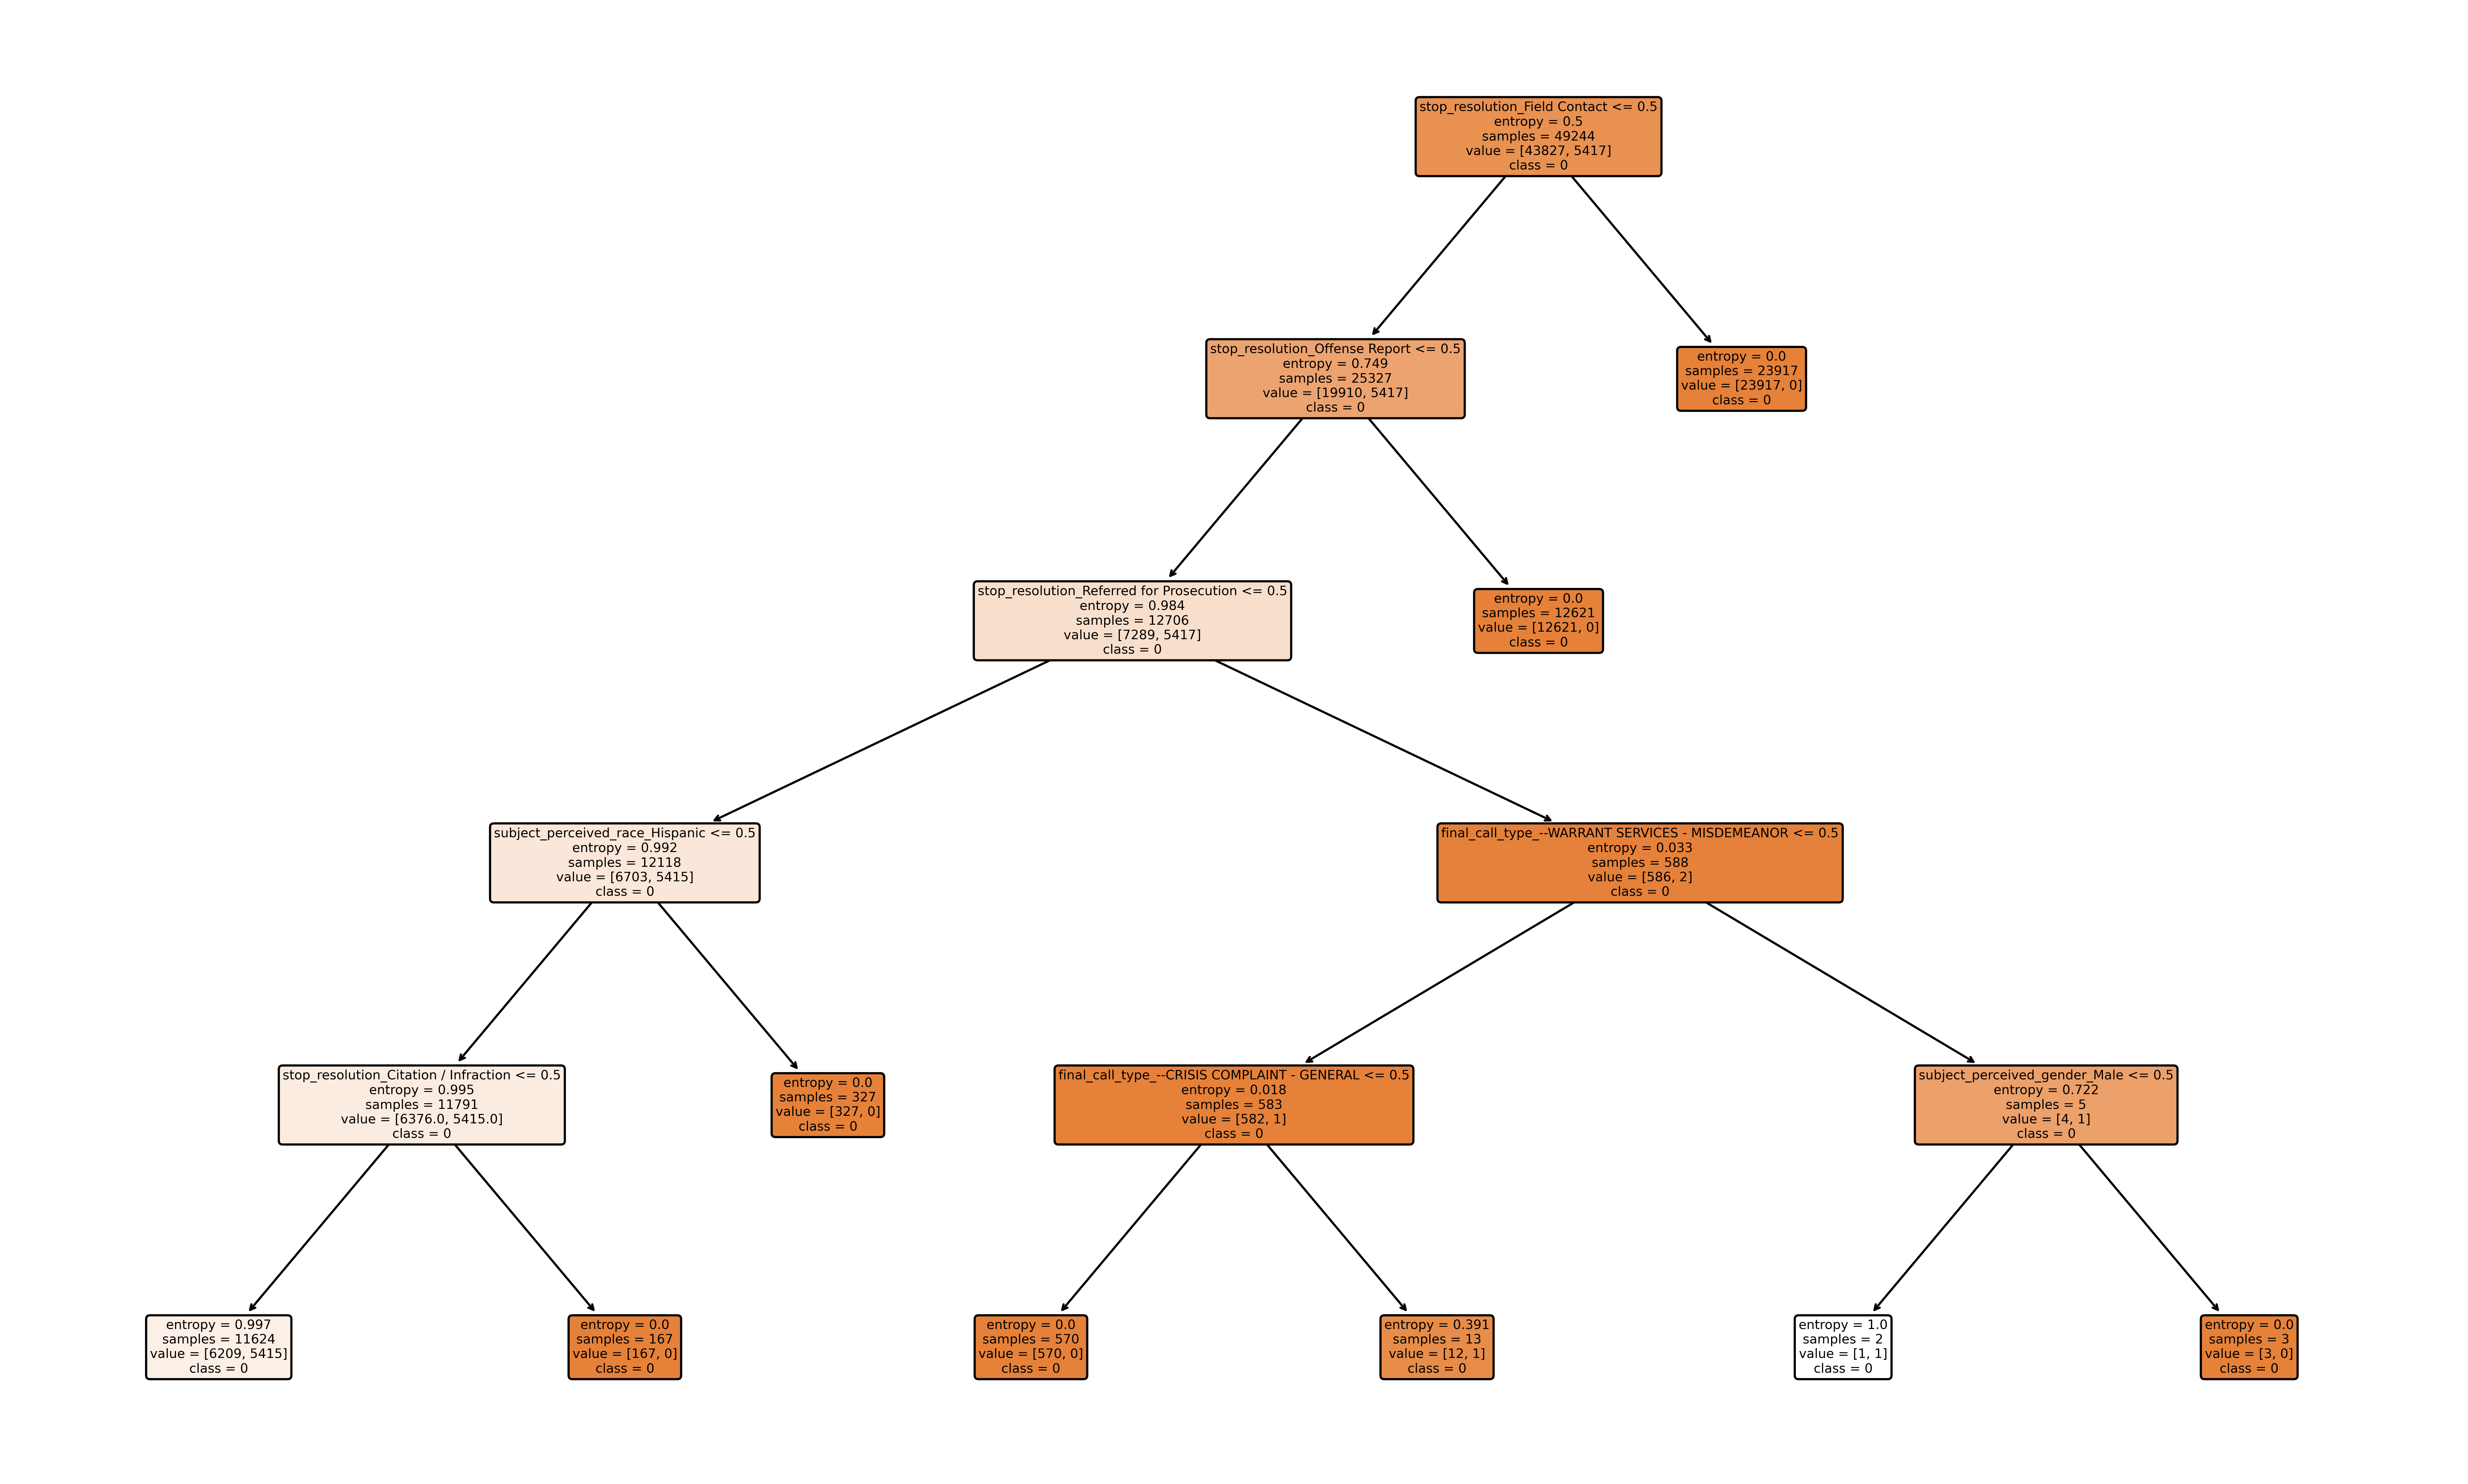

In [67]:
# from sklearn import tree
plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(dt,
              feature_names=X_train_encoded_df.columns,
              class_names=np.unique(y_train_encoded_series).astype('str'),
              filled=True,
              rounded=True,
              max_depth=10)
plt.show()

Max Depth: 1, F1 Score: 0.0
Max Depth: 2, F1 Score: 0.0
Max Depth: 3, F1 Score: 0.0
Max Depth: 4, F1 Score: 0.0
Max Depth: 5, F1 Score: 0.0
Max Depth: 6, F1 Score: 0.0
Max Depth: 7, F1 Score: 0.0
Max Depth: 8, F1 Score: 0.0
Max Depth: 9, F1 Score: 0.628215542919036
Max Depth: 10, F1 Score: 0.13509749303621169
Max Depth: 11, F1 Score: 0.19656992084432717
Max Depth: 12, F1 Score: 0.1897810218978102
Max Depth: 13, F1 Score: 0.19003322259136213
Max Depth: 14, F1 Score: 0.19337748344370861
Max Depth: 15, F1 Score: 0.21391752577319587
Max Depth: 16, F1 Score: 0.5893782383419689
Max Depth: 17, F1 Score: 0.5893782383419689
Max Depth: 18, F1 Score: 0.5895691609977324
Max Depth: 19, F1 Score: 0.2798304058146578
Max Depth: 20, F1 Score: 0.2917166866746699


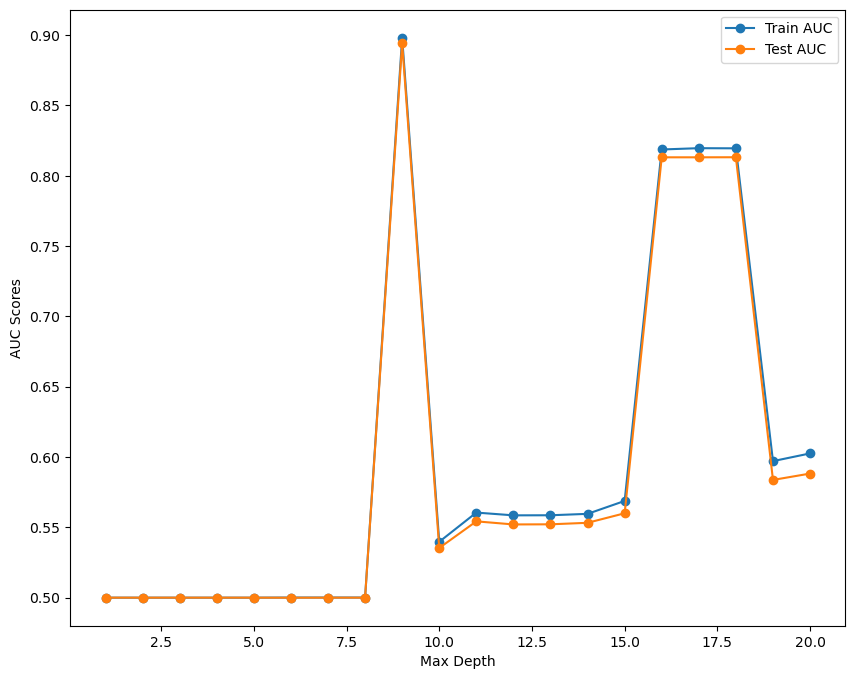

In [79]:
max_depth_values = np.arange(1,21)

train_aucs = []
test_aucs = []

for depth in max_depth_values:
    #Intialize predicted probabilities for training and test sets
    clf = DecisionTreeClassifier(max_depth=depth, random_state=3)
    clf.fit(X_train_encoded_df, y_train)
    
    # Get predicted probabilities for training and test sets
    y_train_prob = clf.predict(X_train_encoded_df)
    y_test_prob = clf.predict(X_test_encoded_df)
    # y_train_prob = clf.predict_proba(X_train_encoded_df)[:,1]
    # y_test_prob = clf.predict_proba(X_test_encoded_df)[:,1]
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_auc = auc(fpr_train, tpr_train)
    test_auc = auc(fpr_test, tpr_test)
    
    # Append AUC to the list
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)


    print(f"Max Depth: {depth}, F1 Score: {f1_score(y_test, y_test_prob)}")
    

# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(max_depth_values, train_aucs, label="Train AUC", marker="o")
plt.plot(max_depth_values, test_aucs, label="Test AUC", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("AUC Scores")
plt.legend()
plt.show()

Min Sample Split: 2, F1 Score: 0.5306
Min Sample Split: 4, F1 Score: 0.5304
Min Sample Split: 6, F1 Score: 0.5312
Min Sample Split: 8, F1 Score: 0.5312
Min Sample Split: 10, F1 Score: 0.5315
Min Sample Split: 12, F1 Score: 0.5311
Min Sample Split: 14, F1 Score: 0.5319
Min Sample Split: 16, F1 Score: 0.5308
Min Sample Split: 18, F1 Score: 0.5303


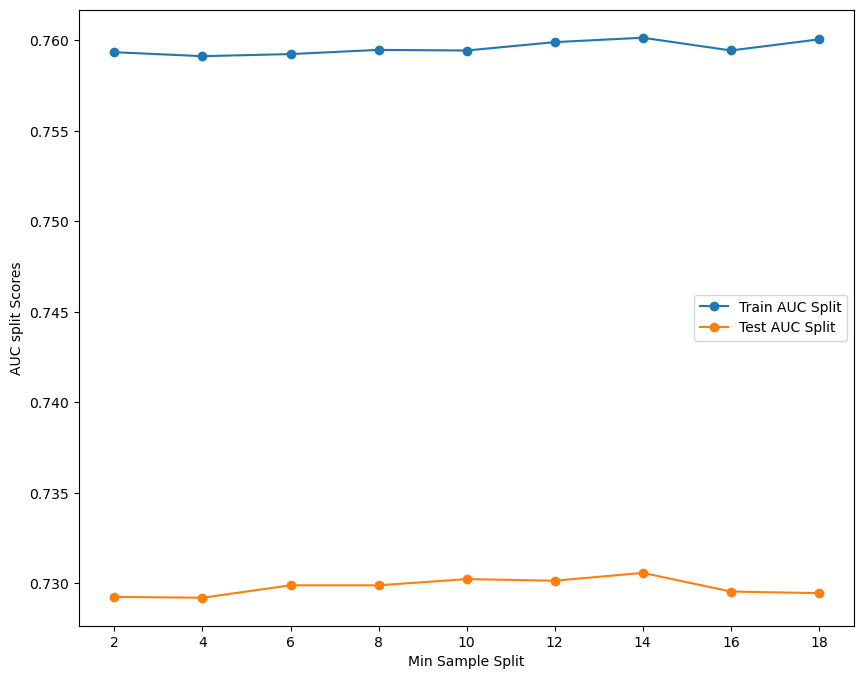

In [93]:
# identify the optimal min-samples-split 
min_sample_splits_value = np.arange(2,20,2)
train_auc_splits = []
test_auc_splits = []

for split in min_sample_splits_value:
    clf_split = DecisionTreeClassifier(min_samples_split=split, random_state=3)
    clf_split.fit(X_train_encoded_df, y_train)

    y_train_probs = clf_split.predict(X_train_encoded_df)
    y_test_probs = clf_split.predict(X_test_encoded_df)
    # y_train_probs = clf_split.predict_proba(X_train_encoded_df)[:,1]
    # y_test_probs = clf_split.predict_proba(X_test_encoded_df)[:,1]

    fpr_train_split, tpr_train_split, _ = roc_curve(y_train, y_train_probs)
    fpr_test_split, tpr_test_split, _ = roc_curve(y_test, y_test_probs)

    train_auc_split = auc(fpr_train_split, tpr_train_split)
    test_auc_split = auc(fpr_test_split, tpr_test_split)
    
    train_auc_splits.append(train_auc_split)
    test_auc_splits.append(test_auc_split)
    print(f"Min Sample Split: {split}, F1 Score: {f1_score(y_test, y_test_probs):.4f}")


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_auc_splits, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value, test_auc_splits, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.show()

Min Sample Leaf: 1, F1 Score: 0.5306122448979592
None
Min Sample Leaf: 2, F1 Score: 0.5239273927392739
None
Min Sample Leaf: 3, F1 Score: 0.5263591433278418
None
Min Sample Leaf: 4, F1 Score: 0.5298935298935299
None
Min Sample Leaf: 5, F1 Score: 0.530209617755857
None
Min Sample Leaf: 6, F1 Score: 0.5229508196721312
None
Min Sample Leaf: 7, F1 Score: 0.5269121813031161
None
Min Sample Leaf: 8, F1 Score: 0.5238095238095238
None
Min Sample Leaf: 9, F1 Score: 0.5224252491694352
None
Min Sample Leaf: 10, F1 Score: 0.521630615640599
None


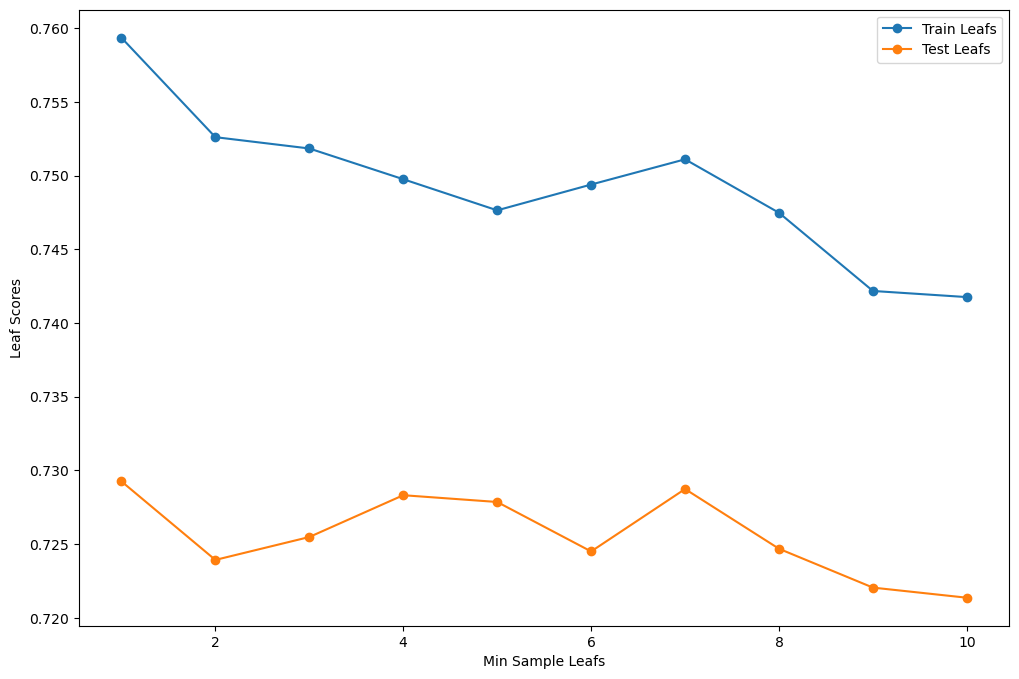

In [86]:
min_sample_leafs_values = np.arange(1,11)
train_auc_leafs = []
test_auc_leafs = []

for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_leaf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_leaf.fit(X_train_encoded_df, y_train)

    y_train_leaf_pred_prob = clf_leaf.predict(X_train_encoded_df)
    y_test_leaf_pred_prob = clf_leaf.predict(X_test_encoded_df)

    # predict probabilities
    # y_train_leaf_pred_prob = clf_leaf.predict_proba(X_train_encoded_df)[:,1]
    # y_test_leaf_pred_prob = clf_leaf.predict_proba(X_test_encoded_df)[:,1]

    # get the false positive and true positive values
    fpr_train_leaf, tpr_train_leaf, _ = roc_curve(y_train, y_train_leaf_pred_prob)
    fpr_test_leaf, tpr_test_leaf, _ = roc_curve(y_test, y_test_leaf_pred_prob)

    # Get the AUC
    train_auc_leaf = auc(fpr_train_leaf, tpr_train_leaf)
    test_auc_leaf = auc(fpr_test_leaf, tpr_test_leaf)

    train_auc_leafs.append(train_auc_leaf)
    test_auc_leafs.append(test_auc_leaf)
    
    print(print(f"Min Sample Leaf: {leaf}, F1 Score: {f1_score(y_test, y_test_leaf_pred_prob)}"))

plt.figure(figsize=(12,8))
plt.plot(min_sample_leafs_values, train_auc_leafs, label="Train Leafs", marker="o")
plt.plot(min_sample_leafs_values, test_auc_leafs, label="Test Leafs", marker="o")
plt.xlabel("Min Sample Leafs")
plt.ylabel("Leaf Scores")
plt.legend()
plt.show()


In [87]:
# Calculate probabilities for ROC and Precision-Recall

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
criterion = ['gini', 'entropy']

for crit in criterion:
    dt = DecisionTreeClassifier(criterion=crit, random_state=9).fit(X_train_encoded_df, y_train)
    y_proba = dt.predict(X_test_encoded_df)
    
    print(f"Criterion: {crit}, F1 Score: {f1_score(y_test, y_proba)}")


Criterion: gini, F1 Score: 0.5306122448979592
Criterion: entropy, F1 Score: 0.5291222313371616


# Combine the best parameters

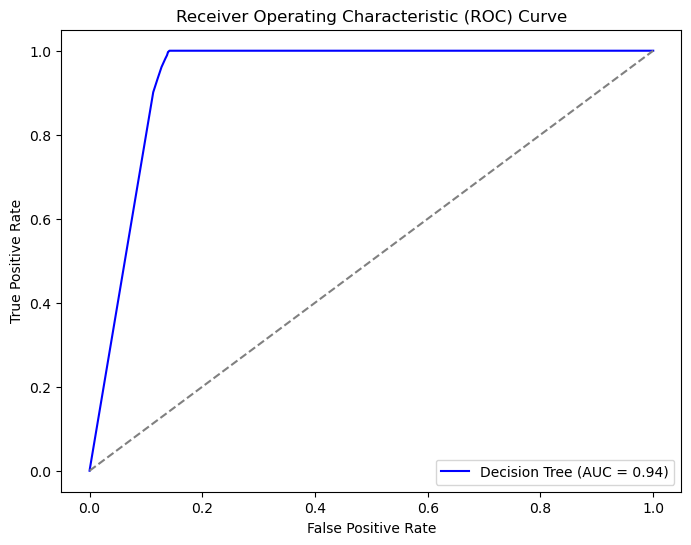

Optimized Decision Tree Performance:

Optimized Accuracy: 0.8885549508569572
Optimized Precision: 0.48232848232848236
Optimized Recall: 0.9013209013209014
Optimized F1 Score: 0.628385698808234


In [96]:
dt_optimized = DecisionTreeClassifier(max_depth=9, 
                                      min_samples_split=14, 
                                      min_samples_leaf=5, 
                                      criterion='gini', 
                                      random_state=9).fit(X_train_encoded_df, y_train)


# Evaluate the model
y_probability_optimized = dt_optimized.predict_proba(X_test_encoded_df)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, y_probability_optimized)
roc_auc = roc_auc_score(y_test, y_probability_optimized)


# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

y_pred_optimized = dt_optimized.predict(X_test_encoded_df)

print("Optimized Decision Tree Performance:\n")
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print(f"Optimized Precision: {precision_score(y_test, y_pred_optimized)}")
print(f"Optimized Recall: {recall_score(y_test, y_pred_optimized)}")
print(f"Optimized F1 Score: {f1_score(y_test, y_pred_optimized)}")


[Text(0.8823529411764706, 0.95, 'stop_resolution_Field Contact <= 0.5\ngini = 0.196\nsamples = 49244\nvalue = [43827, 5417]\nclass = NO Arrest'),
 Text(0.8235294117647058, 0.85, 'stop_resolution_Offense Report <= 0.5\ngini = 0.336\nsamples = 25327\nvalue = [19910, 5417]\nclass = NO Arrest'),
 Text(0.7647058823529411, 0.75, 'stop_resolution_Referred for Prosecution <= 0.5\ngini = 0.489\nsamples = 12706\nvalue = [7289, 5417]\nclass = NO Arrest'),
 Text(0.6470588235294118, 0.65, 'subject_perceived_race_Hispanic <= 0.5\ngini = 0.494\nsamples = 12118\nvalue = [6703, 5415]\nclass = NO Arrest'),
 Text(0.5882352941176471, 0.55, 'stop_resolution_Citation / Infraction <= 0.5\ngini = 0.497\nsamples = 11791\nvalue = [6376.0, 5415.0]\nclass = NO Arrest'),
 Text(0.5294117647058824, 0.45, 'subject_perceived_race_Multi-Racial <= 0.5\ngini = 0.498\nsamples = 11624\nvalue = [6209, 5415]\nclass = NO Arrest'),
 Text(0.47058823529411764, 0.35, 'final_call_type_--WARRANT SERVICES - MISDEMEANOR <= 0.5\ngini 

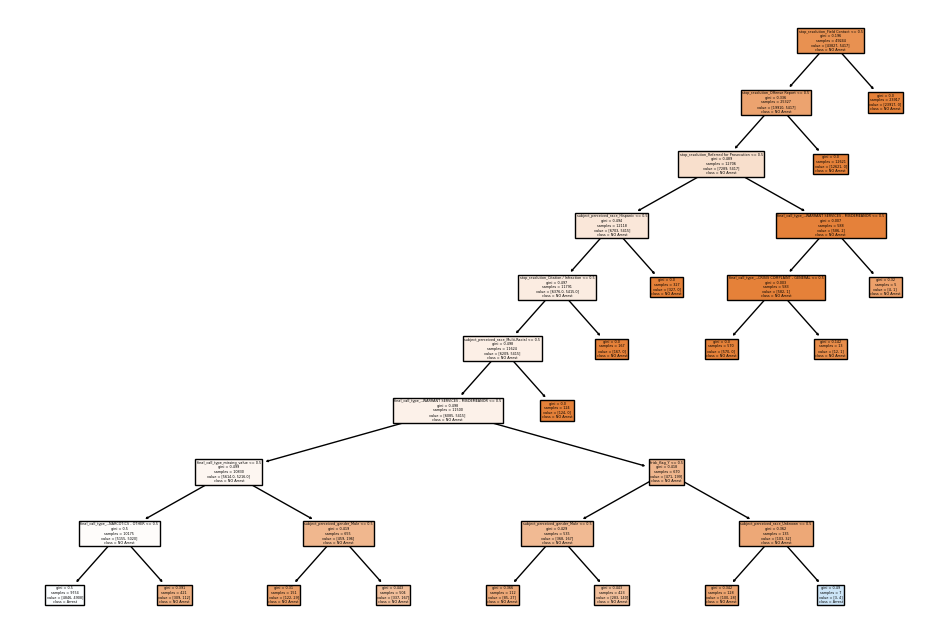

In [102]:
plt.figure(figsize=(12,8))

tree.plot_tree(dt_optimized, feature_names=X_train_encoded_df.columns, class_names=['NO Arrest', 'Arrest'], filled=True)

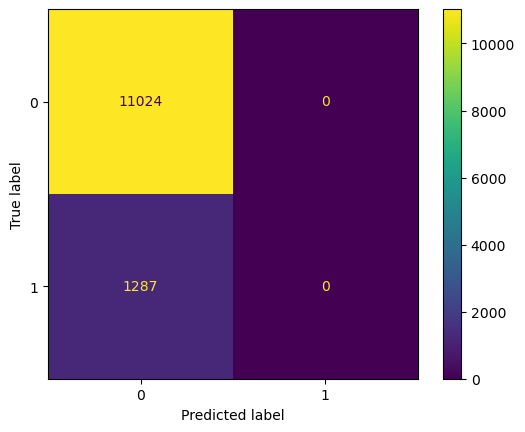

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [98]:
nypd_data.head()

,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2023-01-01,00:44:00,2023,January,Sunday,Based on Radio Run,APP,POM,804,...,BLUE HOODIE BLUE JEANS,5,A,3B,46 MADISON ST,MADISON ST,984781,198509,PBMS,MANHATTAN
1,2,2023-01-01,00:49:00,2023,January,Sunday,Based on Self Initiated,APP,POM,69,...,UNK,69,B,(null),9910 SEAVIEW AVE,SEAVIEW AVE,1015557,170379,PBBS,BROOKLYN
2,3,2023-01-01,05:31:00,2023,January,Sunday,Based on Radio Run,APP,POM,83,...,NaN,83,D,(null),TROUTMAN ST && ST NICHOLAS AVE,TROUTMAN ST,1005940,197103,PBBN,BROOKLYN
3,4,2023-01-01,04:59:00,2023,January,Sunday,Based on Self Initiated,APP,POM,113,...,(null),113,B,(null),FARMERS BLVD && 135 AVE,FARMERS BLVD,1049830,185439,PBQS,QUEENS
4,5,2023-01-01,05:21:00,2023,January,Sunday,Based on Self Initiated,APP,POF,46,...,(null),46,B,(null),2463 WEBSTER AVE,WEBSTER AVE,1013821,252710,PBBX,BRONX


In [99]:
nypd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16971 entries, 0 to 16970
Data columns (total 82 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   STOP_ID                                                       16971 non-null  int64 
 1   STOP_FRISK_DATE                                               16971 non-null  object
 2   STOP_FRISK_TIME                                               16971 non-null  object
 3   YEAR2                                                         16971 non-null  int64 
 4   MONTH2                                                        16971 non-null  object
 5   DAY2                                                          16971 non-null  object
 6   STOP_WAS_INITIATED                                            16971 non-null  object
 7   RECORD_STATUS_CODE                                            16971 non-null

In [109]:
nypd_data[['STOP_WAS_INITIATED',
           'STOP_DURATION_MINUTES',
           'OFFICER_EXPLAINED_STOP_FLAG',
           'SEARCHED_FLAG','FRISKED_FLAG',
           'SUSPECT_ARREST_OFFENSE', 
           'SUMMONS_ISSUED_FLAG', 'FRISKED_FLAG',
           'SEARCHED_FLAG',
           'SUSPECT_REPORTED_AGE',
           'SUSPECT_REPORTED_AGE']]

,STOP_WAS_INITIATED,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,SEARCHED_FLAG,FRISKED_FLAG,SUSPECT_ARREST_OFFENSE,SUMMONS_ISSUED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_REPORTED_AGE
0,Based on Radio Run,10,Y,N,Y,(null),N,Y,N,32,32
1,Based on Self Initiated,3,N,Y,Y,CPW,N,Y,Y,23,23
2,Based on Radio Run,5,Y,N,Y,(null),N,Y,N,30,30
3,Based on Self Initiated,2,Y,Y,Y,(null),N,Y,Y,20,20
4,Based on Self Initiated,14,N,Y,Y,CPW,N,Y,Y,25,25
...,...,...,...,...,...,...,...,...,...,...,...
16966,Based on C/W on Scene,3,Y,Y,Y,CRIMINAL TRESPASS,N,Y,Y,22,22
16967,Based on C/W on Scene,3,Y,Y,Y,CRIMINAL TRESPASS,N,Y,Y,24,24
16968,Based on C/W on Scene,3,Y,Y,Y,CRIMINAL TRESPASS,N,Y,Y,21,21
16969,Based on C/W on Scene,3,Y,Y,Y,MENACING,N,Y,Y,45,45


In [107]:
nypd_data['SUSPECT_ARRESTED_FLAG'] = nypd_data['SUSPECT_ARRESTED_FLAG'].map({"Y": 1, "N": 0})

In [108]:
nypd_data['SUSPECT_ARRESTED_FLAG']

0        0
1        1
2        0
3        0
4        1
        ..
16966    1
16967    1
16968    1
16969    1
16970    0
Name: SUSPECT_ARRESTED_FLAG, Length: 16971, dtype: int64

In [ ]:
#Train test split
#encode